In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Homework 2, Question 1

In [4]:
A=np.array([[0, 1.5, 2.5],[.5,.2,.5],[0,.4,.1]])

In [6]:
np.linalg.eigvals(A)

array([ 1.2830261 +0.j       , -0.49151305+0.2994379j,
       -0.49151305-0.2994379j])

In [9]:
eigsys=np.linalg.eig(A)

The leading eigenvalue:

In [18]:
eigsys[0][0]

(1.2830260958605204+0j)

The stable age distribution

In [25]:
stableage=eigsys[1][:,0]/np.sum(eigsys[1][:,0])
stableage

array([0.57735505+0.j, 0.31585076+0.j, 0.10679418+0.j])

Class reproductive values

In [21]:
lefteigsys=np.linalg.eig(np.transpose(A))

In [27]:
repval=lefteigsys[1][:,0]/np.sum(lefteigsys[1][:,0])
repval

array([0.14784576+0.j, 0.37937993+0.j, 0.47277432+0.j])

Matrix of sensitivities

In [35]:
sens=np.array([[stableage[i]*repval[j] for i in range(0,3,1)] for j in range(0,3,1)])/np.dot(stableage,repval)
sens

array([[0.33385744+0.j, 0.18264173+0.j, 0.06175408+0.j],
       [0.85669561+0.j, 0.46866821+0.j, 0.1584642 +0.j],
       [1.06759386+0.j, 0.58404327+0.j, 0.19747435+0.j]])

The total effect of increasing $a_{13}$ on $\lambda_1$ can be found by using the chain rule:

Consider $\lambda_1$ as a function of $a_{13}$, $a_{23}$ and $a_{33}$, the last two of which are also functions of $a_{13}$ themselves. Now, take the total derivative of $\lambda_1$ w.r.t. $a_{13}$, which reads:

$$
\frac{d\lambda_1}{da_{13}}=\frac{\partial\lambda_1}{\partial a_{13}}+\frac{\partial\lambda_1}{\partial a_{23}}\frac{d a_{23}}{d a_{13}}+\frac{\partial\lambda_1}{\partial a_{33}}\frac{d a_{33}}{d a_{13}}
$$

Now, using the relationships given in the question, we can write:  $a_{33}=5.1-2 a_{13}$, and $a_{23}=25.5-10a_{13}$, which allows us to calculate $\frac{d a_{23}}{d a_{13}}$ and $\frac{d a_{33}}{d a_{13}}$

In [40]:
dlambda13=sens[0,2]-sens[1,2]*10-sens[2,2]*2
dlambda13

(-1.9178366272231733+0j)

## Homework 2 Q 4

As in the iPython notebook in the lecture materials, we assume constant death probabilities $d$ in population size, but a linearly decreasing birth probability.
$$
b_n=b_0- a n
$$
for $n<b_0/a$; $b_n=0$ for $n\geq b_0/a$, except for when $n=0$, we want $b=0$.

Now let's write the transition matrix. We begin by defining the parameters: 

In [183]:
b0=.6
a=.6/20
d=.3

Next, we use list comprehension to generate a list of lists that is our matrix. Notice our use of the Kroenecker delta $\delta_{ij}$ (using the function sym.KroneckerDelta(i,j)), which is simply a shorthand notation for 1 when $i=j$ and 0 elsewhere. We use it to make only diagonal and the offdiagonal elements non-zero. 

For the homework, we use $(1-\delta_{0i})$ in front of the birth terms in the first column to set the birth rate at zero equal to zero. 

In [179]:
transition = [[sym.KroneckerDelta(i,j)*(1-(1-sym.KroneckerDelta(0,i))*(b0-a*i)-(1-sym.KroneckerDelta(0,i))*d)+sym.KroneckerDelta(i,j-1)*d+sym.KroneckerDelta(i,j+1)*(1-sym.KroneckerDelta(1,i))*(b0-a*(i-1)) for j in range(0,21,1)] for i in range(0,21,1)]

Next, we need to convert this list to a numpy array:

In [170]:
transarray=np.asarray(transition, dtype=np.float)

Now, we use numpy.linalg.eig function to get the eigenvalues and vectors. Now, we are interested in the eigenvectors associated with the first two largest eigenvalues. To obtain them, we use numpy's argsort function, which lists the indices of an array such that if you took those indices in that order, you'd have a sorted (from small to large) list. 

In [172]:
eigvals, eigvecs = np.linalg.eig(transarray)
eigord=np.argsort(eigvals)
eigord

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 17, 19, 20, 18, 16,
       15, 14, 13,  0])

Let's look at the eigenvalues themselves: the largest one 1 still 1. The second largest is almost 1: 0.9995.

In [173]:
eigvals

array([ 1.        , -0.51965399, -0.34465437, -0.20426927, -0.0825209 ,
        0.0267291 ,  0.12664811,  0.21912851,  0.30540318,  0.38631956,
        0.46247816,  0.53430827,  0.60211063,  0.99949879,  0.9661841 ,
        0.92771694,  0.88391969,  0.66608036,  0.83544505,  0.72631552,
        0.78281255])

The eigenvector associated with the second largest eigenvalue is below. Notice that the first (or zeroth) element is negative. 

In [174]:
eigvecs[:,eigord[-2]]

array([ -9.56766472e-01,   1.59847581e-03,   4.63290928e-03,
         9.92730170e-03,   1.84478923e-02,   3.10572860e-02,
         4.80746998e-02,   6.87130318e-02,   9.06205941e-02,
         1.09886965e-01,   1.21834325e-01,   1.22589440e-01,
         1.10880799e-01,   8.90696930e-02,   6.25650297e-02,
         3.76507347e-02,   1.88741808e-02,   7.56695265e-03,
         2.27472394e-03,   4.55782543e-04,   4.56545296e-05])

The first line gets the eigenvector associated with the largest eigenvalue (you can check that the latter is 1), normalizes it so that its sum is equal to 1 (since that gives us the stationary distribution), and plots the resulting values. 

The rest of the lines take the second eigenvector, sets its zeroth element (which was negative) to zero, normalizes it, and plots it.

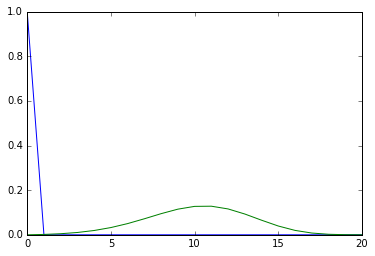

In [175]:
plt.plot(eigvecs[:, eigord[-1]]/np.sum(eigvecs[:, eigord[-1]]))
seceigvec=eigvecs[:, eigord[-2]]
seceigvec[0]=0
seceigvec=seceigvec/np.sum(seceigvec)
plt.plot(seceigvec)

Now, the first eigenvector is 1 at 0, and zero everywhere else, while the (renormalized) second eigenvector has a unimodel distribution. Hmmm.

Now we can also write a function that iterates the transition matrix n times, starting from an initial population.

In [176]:
def transiterate(trans, init, nit):
    vec=init
    for i in range(nit):
        vec=np.dot(trans, vec)
    return vec

Initialize the population at size 10.

In [177]:
init = np.asarray([sym.KroneckerDelta(i,10) for i in range(0,21)], dtype=np.float32)

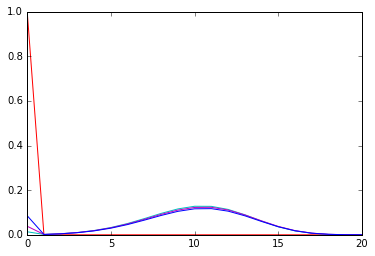

In [178]:
plt.plot(eigvecs[:, eigvals.argmax()]/np.sum(eigvecs[:, eigvals.argmax()]),'r')
plt.plot(transiterate(transarray,init,50),'c')
plt.plot(transiterate(transarray,init,100),'m')
plt.plot(transiterate(transarray,init,200),'b')

Again, the red line gives the first eigenvector. The probability distribution of the population after 200 iterations seems to not quite converge to the first eigenvector though. Instead, the cyan, magenta, and blue distributions are quite close to one-another, and resemble the second eigenvector. The exception is that the weight at $n=0$, i.e., extinction, is increasing slowly...

Let's modify the stochastic simulation. 

In [180]:
def discretes(b0,a,d,n0,tmax):
    popsize=list([]) #make list for pop size, keep it empty
    pop=n0
    i=0
    while i <= tmax and pop >= 0:
        popsize.append(pop) #add the current population size to the population history
        bn=(1-sym.KroneckerDelta(pop,0))*np.max([b0-a*pop,0]) #We added one 1-Kroeckerdelta here that makes birth probability zero when pop=0.
        pop=pop+np.dot([1,-1,0],np.random.multinomial(1,[bn,d,1-bn-d])) #choose birth or death, increment or decrement population size accordingly
        i+=1
    return popsize

Here's a sample trajectory

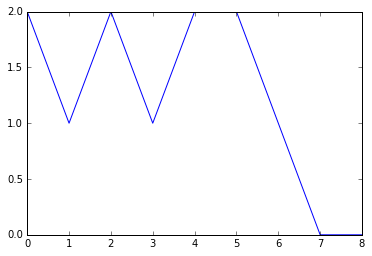

In [181]:
plt.plot(discretes(.6,.6/20,d,2,100))

Here are 20 more. Now, you see populations going extinct and not coming back.

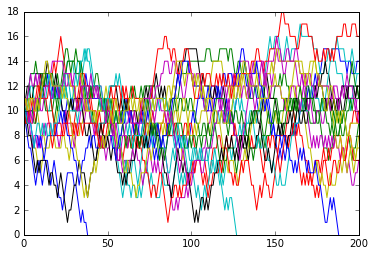

In [194]:
for i in range(20):
    plt.plot(discretes(.6,.6/20,d,10,200))

In [197]:
discendpop=list([])
for i in range(200):
    hists = discretes(.6,.6/20,d,10,100)
    discendpop.append(hists[-1])

Now, if we plot the distribution of where an ensemble of populations is after 100 time steps, the distribution looks much more similar to the second eigenvector than the first. This suggests that the second eigenvector gives a quasi-stationary distribution, i.e., the distribution of populations that have not yet gone extinct. 

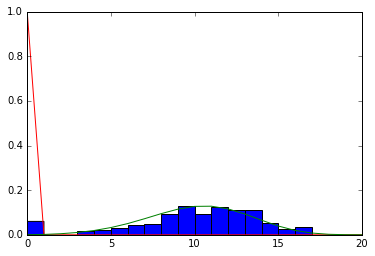

In [198]:
plt.hist(discendpop, normed=True, bins=range(0,max(discendpop)+1,1));
plt.plot(eigvecs[:, eigvals.argmax()]/np.sum(eigvecs[:, eigvals.argmax()]),'r')
plt.plot(seceigvec)

However, this does not mean that the first eigenvector is chopped liver. It still has the largest eigenvalue, and there still is just one absorbing state: extinction. Thus, if we run the populations further and further into the future, they will eventually all go extinct, although conditional on the population not going extinct, the second eigenvector will give us the quasi-stationary distribution.

In [203]:
discendpop=list([])
for i in range(200):
    hists = discretes(.6,.6/20,d,10,1000)
    discendpop.append(hists[-1])

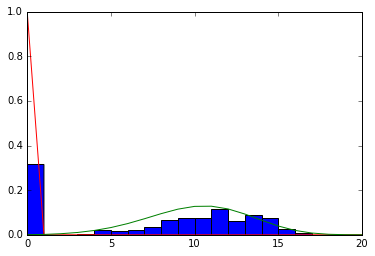

In [204]:
plt.hist(discendpop, normed=True, bins=range(0,max(discendpop)+1,1));
plt.plot(eigvecs[:, eigvals.argmax()]/np.sum(eigvecs[:, eigvals.argmax()]),'r')
plt.plot(seceigvec)